In [1]:
# Import dependencies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
def dis_res(x):
    display(Markdown('___\n##### **Result**: \n\n' + x + '\n___'))

# Estimating the global mass of Rubisco
In the notebook  [**```leaf_mass_estimate.ipynb```**](leaf_mass_estimate.ipynb), we estimated the total mass of leaves at ≈10 Gt dry weight. In this notebook we estimate the total mass of Rubisco based on the total mass of leaves and the fraction of Rubisco out of the total mass of leaves.
We rely on a recent meta-anaylsis by [Onoda et al.](http://dx.doi.org/10.1111/nph.14496), which measured the leaf nitrogen content per leaf mass (Nmass) as well as the fraction of leaf nitrogen found in Rubisco (Nrub/N), for about a hundred different plant species.
Here is a sample of the data:

In [2]:
onoda = pd.read_excel('../data/literature_data.xlsx','Onoda')
onoda.head()

,no,Dataset,Species,Family,Growth condition,Pot/Field,Location/treatment,GF,EveDec,Aarea,...,Rubisco_area,Nrub/N,CWarea,CWmass,Nconc_in_CW,Ncw_area,Ncw/N,CW extraction,CW-N method,Ref
0,1,Feng et al. (2009),Ageratina adenophora,Asteraceae,Outdoor,Field,Mexico,H,D,12.72,...,NaN,NaN,NaN,NaN,NaN,0.110,0.093,SDS,Ninhidrin?,"Feng, Y.L., Lei, Y.B., Wang, R.F., Callaway, R..."
1,2,Feng et al. (2009),Ageratina adenophora,Asteraceae,Outdoor,Field,China,H,D,14.91,...,NaN,NaN,NaN,NaN,NaN,0.037,0.035,SDS,Ninhidrin?,"Feng, Y.L., Lei, Y.B., Wang, R.F., Callaway, R..."
2,3,Feng et al. (2009),Ageratina adenophora,Asteraceae,Outdoor,Field,India,H,D,16.63,...,NaN,NaN,NaN,NaN,NaN,0.086,0.064,SDS,Ninhidrin?,"Feng, Y.L., Lei, Y.B., Wang, R.F., Callaway, R..."
3,4,Funk et al (2013),Acacia koa,Fabaceae,Outdoor,Field,Hawaii (native),W,E,14.30,...,NaN,NaN,NaN,NaN,NaN,0.086,0.036,SDS,Ninhidrin,"Funk, J.L., Glenwinkel, L.A. & Sack, L. (2013)..."
4,5,Funk et al (2013),Dodonaea viscosa,Sapindaceae,Outdoor,Field,Hawaii (native),W,E,10.90,...,NaN,NaN,NaN,NaN,NaN,0.232,0.100,SDS,Ninhidrin,"Funk, J.L., Glenwinkel, L.A. & Sack, L. (2013)..."


The dataset contains information of species from three different growth forms: woody, herbaceous plants and grasses. For each one of these groups, we calculate mass fraction of rubisco out of the total leaf mass by multiplying the nitrogen content per leaf mass by the fraction of leaf nitrogen in Rubisco. This gives us the total amount of rubisco nitrogen per leaf mass. To convert this result into the mass fraction of rubisco per leaf mass, we use the fact that nitrogen accounts for about a sixth of the mass of rubisco. We plot below the distribution of the mass fraction of rubisco per leaf mass for each growth form:

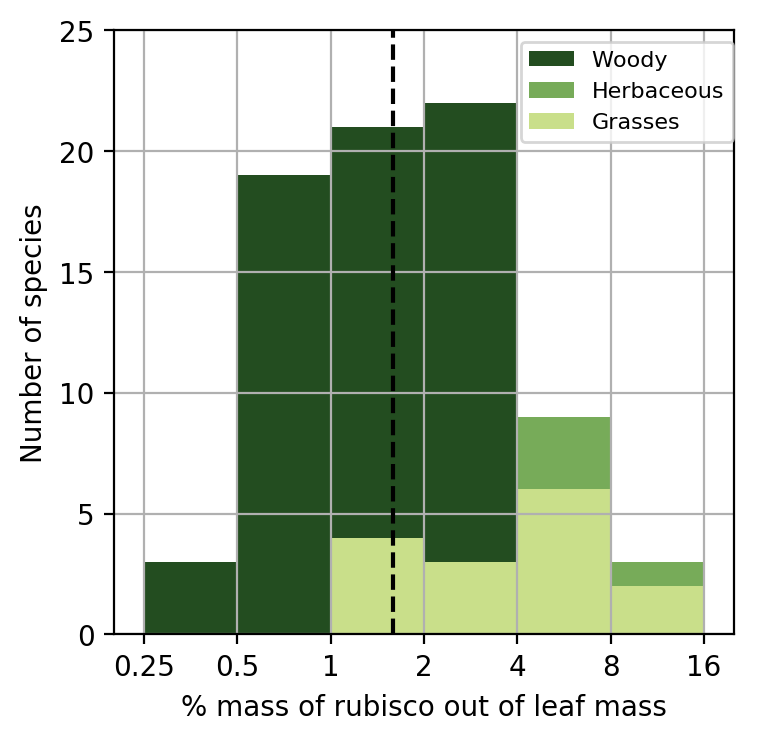

In [66]:
# Drop data with no Nrub/N and Nmass data
filt_onoda = onoda.loc[onoda[['Nrub/N','Nmass']].dropna().index]

# Calculate the mass fraction of rubisco per leaf mass
filt_onoda['Rub_frac'] = filt_onoda['Nmass']/100*filt_onoda['Nrub/N']*6

# Convert mass fraction to log scale for plotting histograms
filt_onoda['log_rub_frac'] = np.log10(filt_onoda['Rub_frac'])


# Plot the distributions of the mass fraction of rubisco out of the total leaf mass for each growth form
plt.figure(figsize=(4,4),dpi=200)
h = filt_onoda.loc[filt_onoda['GF']=='W','log_rub_frac'].hist(label='Woody',bins=np.log10([1e-100,0.0025,0.005,0.01,0.02,0.04,0.08,0.16,1e100]),color='#234d20')
filt_onoda.loc[filt_onoda['GF']=='H','log_rub_frac'].hist(label='Herbaceous',bins=np.log10([1e-100,0.0025,0.005,0.01,0.02,0.04,0.08,0.16,1e100]),color='#77ab59')
filt_onoda.loc[filt_onoda['GF']=='G','log_rub_frac'].hist(label='Grasses',bins=np.log10([1e-100,0.0025,0.005,0.01,0.02,0.04,0.08,0.16,1e100]),color='#c9df8a')
plt.legend(fontsize=8,bbox_to_anchor=(0.638,1))
plt.xlabel('% mass of rubisco out of leaf mass')
plt.vlines(filt_onoda.loc[filt_onoda['GF']=='W','log_rub_frac'].mean(),ymin=0,ymax=25,linestyles='dashed',colors='k')
plt.ylabel('Number of species')
plt.ylim([0,25])
plt.xlim(np.log10([0.002,0.2]))

ax = plt.gca()

ticks = [0.25,0.5,1,2,4,8,16]
ax.set_xticks(np.log10([0.0025,0.005,0.01,0.02,0.04,0.08,0.16]))
ax.set_xticklabels(ticks)
plt.savefig('../figures/figure1_20180912.png',dpi=600)

In the red line in the figure above represents the mean mass fraction of rubisco in woddy plants, which we use as representative for calculating the total mass of rubisco. We now use this mean fraction to estimate the total mass of rubisco:

In [11]:
# Calculate the meas fraction of rubisco out of leaf mass in woody plants
rub_frac_mean = 10**(filt_onoda.loc[filt_onoda['GF']=='W','log_rub_frac'].mean())

# Our best estimate for the total leaf mass is ≈28 Gt
best_leaf_mass = 28e15

# Calculate the total mass of rubisco
tot_rub_mass = rub_frac_mean*best_leaf_mass

dis_res('Our best estimate for the total mass of rubisco is ≈%.1f Gt' %(tot_rub_mass/1e15))

___
##### **Result**: 

Our best estimate for the total mass of rubisco is ≈0.4 Gt
___

## Estimating the total mass of marine rubisco
To estimate the total mass of Rubisco proteins in the marine environment, we rely on the estimate made in [Bar-On et al.](https://dx.doi.org/10.1073/pnas.1711842115) for the total mass of marine producers. Bar-On et al. estimate the total mass of marine producers at ≈1 Gt C. We assume carbon accounts for ≈50% of the dry weight of marine producers, and that proteins also account for ≈50% of the dry weight of marine producers, so we estimate the total mass of proteins in marine producers at ≈1 Gt. To estimate the mass of Rubisco out of the total mass of proteins in marine producers, we use data from several different sources on the fraction of Rubisco out of the total proteome of several different marine producer species. Here is a sample of the data:

In [18]:
marine_proteome_mass = 1e15 #Our estimate for the total mass of proteins in marine producers is 1 Gt

marine_rubisco_frac = pd.read_excel('../data/literature_data.xlsx','marine_rubisco_content')
marine_rubisco_frac.head()

,Species,Exponential,Stationary,Mean fraction of rubisco out of the proteome (%),Reference,Remarks
0,Thalassiosira weissflogii,2.5,1.2,1.85,https://doi.org/10.1111/nph.12143,Table 1
1,Thalassiosira oceanica,2.0,0.6,1.30,https://doi.org/10.1111/nph.12143,Table 1
2,Skeletonema costatum,1.4,0.8,1.10,https://doi.org/10.1111/nph.12143,Table 1
3,Chaetocerosmuelleri,3.7,0.5,2.10,https://doi.org/10.1111/nph.12143,Table 1
4,Phaeodactylum tricornutum,3.2,1.6,2.40,https://doi.org/10.1111/nph.12143,Table 1


We calculate the mean fraction of Rubisco for each species, and them use the median fraction between species as our best estimate for the characteristic fraction of Rubisco out of the proteome of marine producers:

In [17]:
best_marine_rubisco_frac = marine_rubisco_frac.groupby('Species').mean()['Mean fraction of rubisco out of the proteome (%)'].median()
dis_res('Our best estimate for the fraction of Rubisco out of the proteome of marine producers is %.0f' %best_marine_rubisco_frac + '%')

___
##### **Result**: 

Our best estimate for the fraction of Rubisco out of the proteome of marine producers is 3%
___

We multiply the total mass of proteins in marine producers by the characteristic fraction of Rubisco out of the total mass of proteins to estimate the total mass of marine Rubisco

In [21]:
tot_marine_rub_mass = marine_proteome_mass*best_marine_rubisco_frac/100
dis_res('Our best estimate for the total mass of marine Rubisco proteins is ≈%.2f Gt' %(tot_marine_rub_mass/1e15))

___
##### **Result**: 

Our best estimate for the total mass of marine Rubisco proteins is ≈0.03 Gt
___